Getting the stats in the raw data to see how the features are distributted.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML

plt.style.use('ggplot')

sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii_generate'
password = '012500'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password)
query_schema = 'set search_path to ' + schema_name + ';'

当前统计是在未筛选情况下。考虑分布情况后，做筛选，在做一次统计

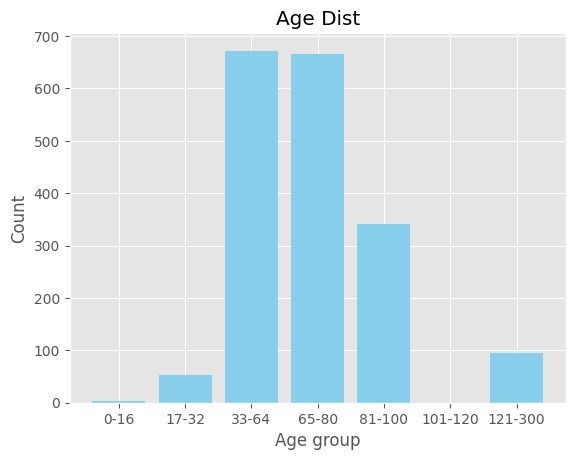

In [7]:
age_query = '''
select distinct subject_id, age 
from mimiciii_generate.patient_sepsis_all
where subject_id is not null
order by subject_id
'''
patient_complete = pd.read_sql_query(age_query, con)
bins = [0, 16, 32, 64, 80, 100,120, 300]
labels = ['0-16', '17-32', '33-64', '65-80', '81-100', '101-120', '121-300']


patient_complete['age_group'] = pd.cut(patient_complete['age'], bins=bins, labels=labels, right=False)

age_distribution = patient_complete['age_group'].value_counts().sort_index()
age_distribution = age_distribution.reset_index()
age_distribution.columns = ['Age Group', 'Count']


plt.bar(age_distribution['Age Group'], age_distribution['Count'], color='skyblue')
plt.title('Age Dist')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()
#rint(age_distribution)


  index  gender
0     M     854
1     F     746


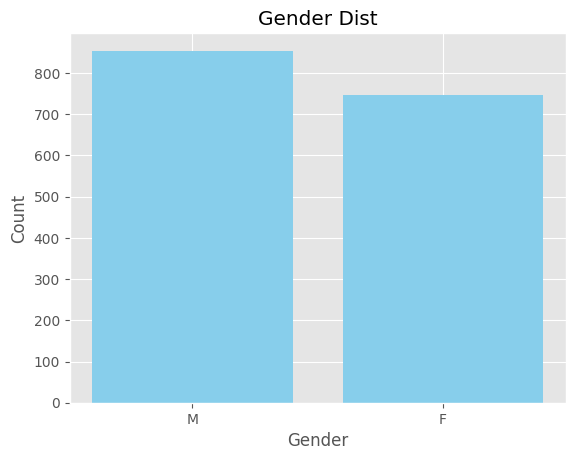

In [5]:
gender_query = '''
select distinct subject_id, gender 
from mimiciii_generate.patient_sepsis_all
where subject_id is not null
order by subject_id
'''
patient_gender = pd.read_sql_query(gender_query, con)
gender_count = patient_gender['gender'].value_counts().reset_index()
print(gender_count)
gender_count.columns = ['gender','count']

plt.bar(gender_count['gender'], gender_count['count'],color='skyblue')
plt.title('Gender Dist')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Death number

   index  died_immediately
0      0              1439
1      1               438


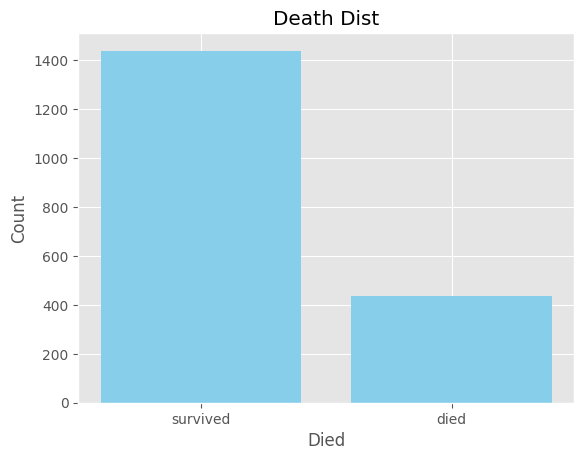

In [16]:
death_query = '''
select distinct icustay_id, died_immediately 
from mimiciii_generate.patient_sepsis_all
where subject_id is not null
order by icustay_id
'''
patient_death = pd.read_sql_query(death_query, con)
death_count = patient_death['died_immediately'].value_counts().reset_index()
print(death_count)
death_count.columns = ['died','count']
death_count['died'] = death_count['died'].replace({0: 'survived', 1: 'died'})

plt.bar(death_count['died'], death_count['count'],color='skyblue')
plt.title('Death Dist')
plt.xlabel('Died')
plt.ylabel('Count')
plt.show()



icustay duration

   icustay_id  icudura
0      200030   6.1555
1      200036   2.9933
2      200085   3.2237
3      200231   5.2890
4      200328   1.6424
5      200410   1.4460
6      200441   6.1679
7      200454   2.1477
8      200457   1.9937
9      200469   0.9630


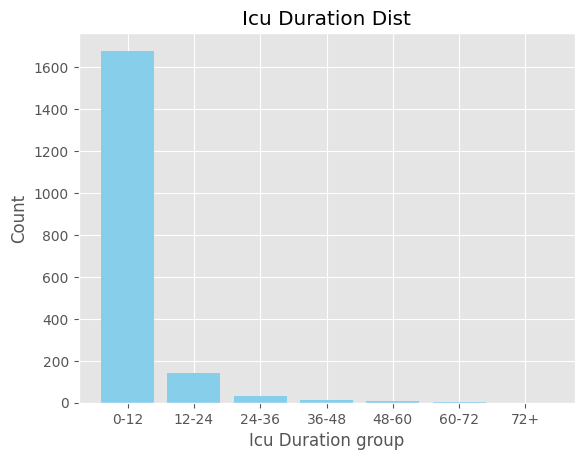

In [13]:
icuDura_query = '''
select distinct icustay_id, icu_duration_hour as icuDura 
from mimiciii_generate.patient_sepsis_all
where subject_id is not null
order by icustay_id
'''
icuDura_complete = pd.read_sql_query(icuDura_query, con)
bins = [0, 12, 24, 36, 48, 60, 72, 1000]
labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72', '72+']
print(icuDura_complete.head(10))


icuDura_complete['dura_group'] = pd.cut(icuDura_complete['icudura'], bins=bins, labels=labels, right=False)

icuDura_distribution = icuDura_complete['dura_group'].value_counts().sort_index()
icuDura_distribution = icuDura_distribution.reset_index()
icuDura_distribution.columns = ['dura_group', 'Count']


plt.bar(icuDura_distribution['dura_group'], icuDura_distribution['Count'], color='skyblue')
plt.title('Icu Duration Dist')
plt.xlabel('Icu Duration group')
plt.ylabel('Count')
plt.show()

In [ ]:
complete_query = '''
select * 
from mimiciii_generate.patient_sepsis_all

'''

统计各个病症的数量。

存入数据库！

                               diagnosis   num
0                                NEWBORN  7718
1                              PNEUMONIA  1619
2                                 SEPSIS  1250
3               CONGESTIVE HEART FAILURE   993
4                CORONARY ARTERY DISEASE   890
...                                  ...   ...
14983         ETOH WITHDRAWAL;CHEST PAIN     1
14984          ETOH WITHDRAWAL;CIRRHOSIS     1
14985        ETOH WITHDRAWAL;EKG CHANGES     1
14986  ETOH WITHDRAWAL;FAILURE TO THRIVE     1
14987                               None     1

[14988 rows x 2 columns]


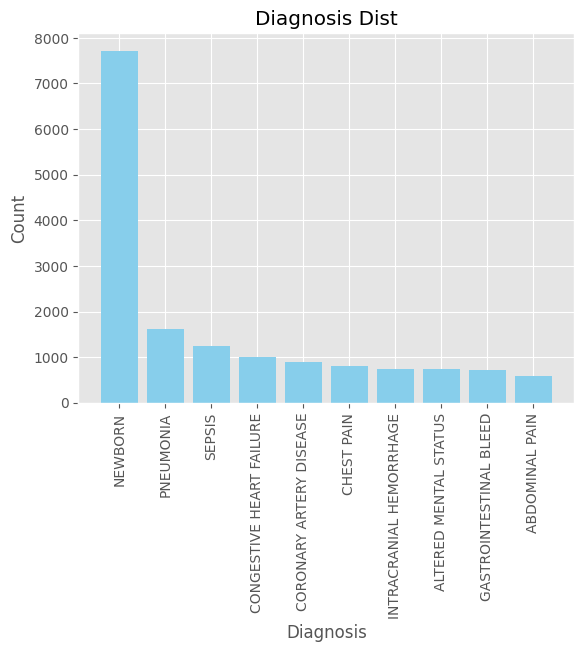

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML

plt.style.use('ggplot')

sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii_generate'
password = '012500'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password)
query_schema = 'set search_path to ' + schema_name + ';'

diag_only_query = '''
select distinct diagnosis, count(distinct icustay_id) as num
from mimiciii_generate.patients_all
where subject_id is not null 
group by diagnosis
order by diagnosis asc;
'''
diagnosis_num = pd.read_sql_query(diag_only_query, con)
diagnosis_num = diagnosis_num.sort_values(by='num',ascending=False).reset_index(drop=True)
print(diagnosis_num)
diagnosis_num.to_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\all_diag.csv')

sepsis_top10 = diagnosis_num.head(10)
plt.bar(sepsis_top10['diagnosis'], sepsis_top10['num'],color='skyblue')
plt.title('Diagnosis Dist')
plt.xlabel('Diagnosis')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()





                              diagnosis   num
0                                SEPSIS  1250
1                             UROSEPSIS   114
2                      SEPSIS;TELEMETRY    44
3                      PNEUMONIA;SEPSIS    19
4                            R/O SEPSIS    12
..                                  ...   ...
338          R/O SEPSIS, S/P LAP CHOLE.     1
339            R/O SEPSIS;RENAL FAILURE     1
340  R/O SEPSIS;SMALL BOWEL OBSTRUCTION     1
341                       R/O UROSEPSIS     1
342          SEPSIS,COLONIC OBSTRUCTION     1

[343 rows x 2 columns]


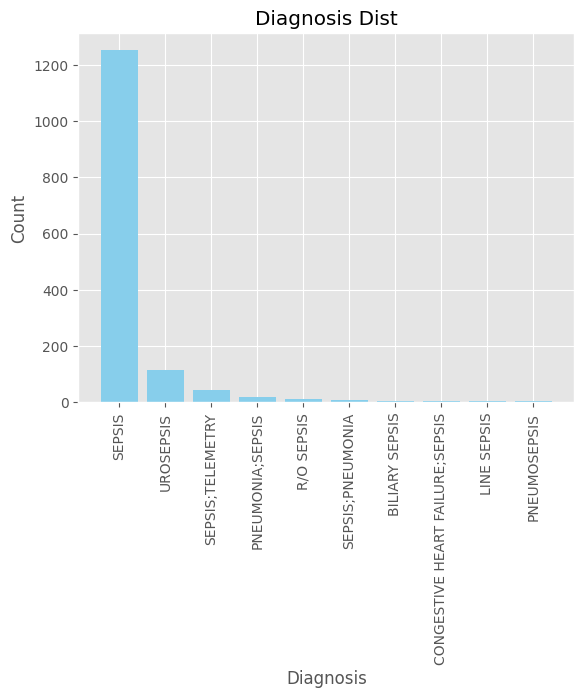

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML

plt.style.use('ggplot')

sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii_generate'
password = '012500'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password)
query_schema = 'set search_path to ' + schema_name + ';'

diag_only_query = '''
select distinct diagnosis, count(distinct icustay_id) as num
from mimiciii_generate.patient_sepsis_incomplete
where subject_id is not null and diagnosis ~*'sepsis'
group by diagnosis
order by diagnosis asc;
'''
diagnosis_num = pd.read_sql_query(diag_only_query, con)
diagnosis_num = diagnosis_num.sort_values(by='num',ascending=False).reset_index(drop=True)
print(diagnosis_num)
#diagnosis_num.to_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\sepsis.csv')

sepsis_top10 = diagnosis_num.head(10)
plt.bar(sepsis_top10['diagnosis'], sepsis_top10['num'],color='skyblue')
plt.title('Diagnosis Dist')
plt.xlabel('Diagnosis')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()





假设针对sepsis统计。图很丑，先不管

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML

plt.style.use('ggplot')

sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii_generate'
password = '012500'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password)
query_schema = 'set search_path to ' + schema_name + ';'

patient_sepsis_complete_query = '''
WITH   patient_sepsis as (
        select * from mimiciii_generate.patient_sepsis_complete
        )
        select * from patient_sepsis
    
'''

patient_sepsis_complete = pd.read_sql_query(patient_sepsis_complete_query, con)
case_num = patient_sepsis_complete['icustay_id'].nunique()
test_counts = patient_sepsis_complete.groupby('test_label')['icustay_id'].nunique()
test_percent = (test_counts / case_num * 100).round(2).reset_index()
test_percent.columns = ['test_label', 'test_percent']
test_percent = test_percent.sort_values(by='test_percent', ascending=False).reset_index(drop=True)
print(test_percent)
test_percent.to_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\tests_sepsis_all.csv')

               test_label  test_percent
0        Glucose (70-105)         61.80
1     Potassium (3.5-5.3)         61.80
2        Sodium (135-148)         61.75
3              Hematocrit         61.64
4      Chloride (100-112)         61.59
...                   ...           ...
1250   Erythromycin Oint.          0.05
1251                 FIO2          0.05
1252    FIO2 Alarm [High]          0.05
1253     FIO2 Alarm [Low]          0.05
1254  KCL-10 MEQ-DIALYSIS          0.05

[1255 rows x 2 columns]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML

plt.style.use('ggplot')

sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii_generate'
password = '012500'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password)
query_schema = 'set search_path to ' + schema_name + ';'
query = '''
select * from mimiciii_generate.patient_sepsis_all_dropdup
'''
patient_data_all = pd.read_sql_query(query, con, index_col=None)
data = patient_data_all.iloc[:, 11:-3]

null_ratios = data.isnull().mean(axis=1)

filtered_df = patient_data_all[null_ratios <= 0.25]
filtered_df.to_csv(r'F:\STUDY\python_code\Pract_DA\prepocess\patient_sepsis_all_dropdup_dropnull25.csv')

Focus on patients that are:
在ICU总时长统计，

100 > age > 16

icu_times_total = icu_times 
即，只考虑最后一次进ICU的情况。若有多次进入ICU，那么同一人的多次入院的检测数据会有multilinear
仅针对某种病症（e.g. sepsis）

加一个feature 生了几个病（失败，sepsis通常是有别的病引起的，因此有sepsis很有可能就有别的病。如果仅用sepsis;xxx来判断不可靠。可能需要从原数据统计，比较麻烦，先放一边）

加一个feature，进了几次ICU，按sepsis算，

保留最后一次sepsis的记录

统计sepsis病历的占比